In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp

In [28]:
def vector_field(R_0):
    def ode_func(t,y):
        s,i,r = y
        return np.array([-R_0*i*s, R_0*i*s-i, i])
    return ode_func

In [83]:
def compute_traj(R_0, t_span=(0,50), num_nodes=1000):
    i_0 = 1e-5
    y_0 = np.array([1.0-i_0, i_0, 0.0])
    t_eval = np.linspace(t_span[0], t_span[1], num_nodes)
    sol = solve_ivp(vector_field(R_0), t_span, y_0, t_eval=t_eval, dense_output=True)
    return sol

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

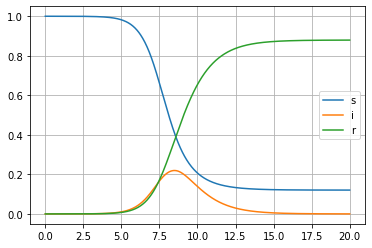

In [103]:
sol = compute_traj(2.4, t_span=(0,20))
plt.plot(sol.t, sol.y[0,:], label='s')
plt.plot(sol.t, sol.y[1,:], label='i')
plt.plot(sol.t, sol.y[2,:], label='r')
plt.legend()
plt.grid()
plt.x_label('t')
plt.savefig('sir.jpg')

In [93]:
max_infection = list()
R_arr = np.linspace(0,4,50)
for R_0 in R_arr:
    sol = compute_traj(R_0)
    max_infection.append(np.max(sol.y[1,:]))
max_infection = np.array(max_infection)

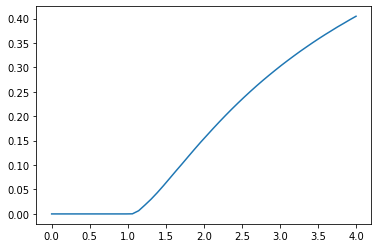

In [94]:
plt.plot(R_arr, max_infection)